# Importing Basic & Imp Liabraries & Dataset for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
data = pd.read_excel('iris.xlsx')

# Exploratory Data Analysis

In [3]:
data.head()

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sepal_len_cm    150 non-null    float64
 1   sepal_width_cm  150 non-null    float64
 2   petal_len_cm    150 non-null    float64
 3   petal_width_cm  150 non-null    float64
 4   species         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.groupby('species').describe()

sepal_len_cm                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width_cm         ... petal_len_cm      petal_width_cm  \
                         count   mean  ...          75%  max          count   
species                                ...                                    
Iris-setosa               50.0  3.418  ...        1.575  1.9           50.0   
Iris-versicolor           50.0  2.770  ...        4.600  5.1           50.0   
Iris-virginica            50.0  2.974  ...        5.875  6.9           50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [9]:
data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data Visualization

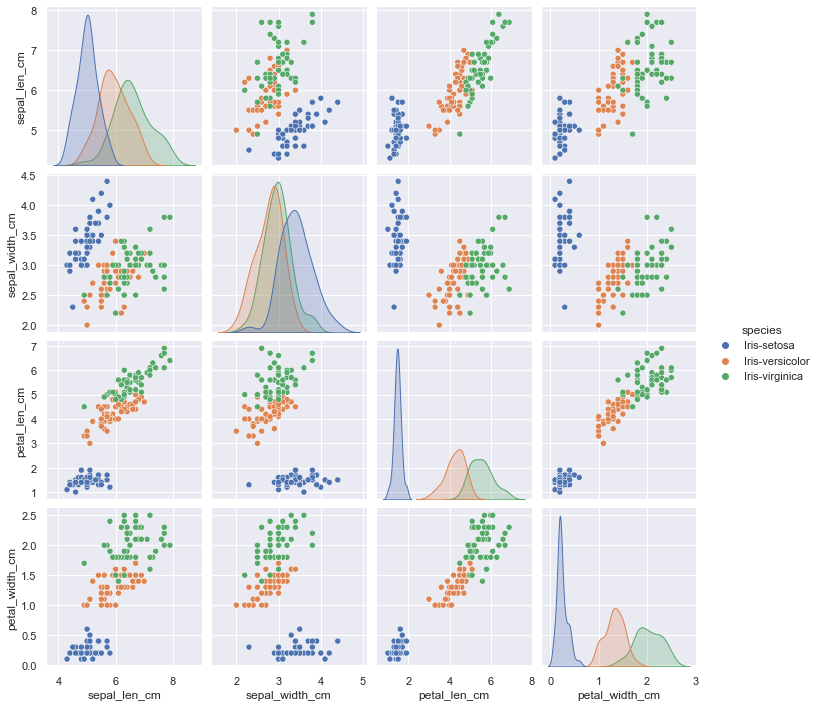

In [10]:
sns.pairplot(data, hue='species')

Sepal Length


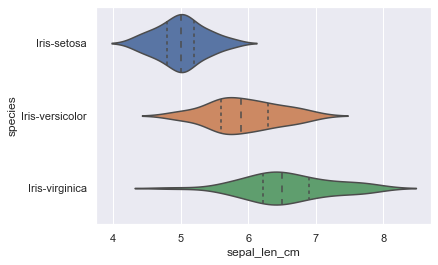

Sepal Width


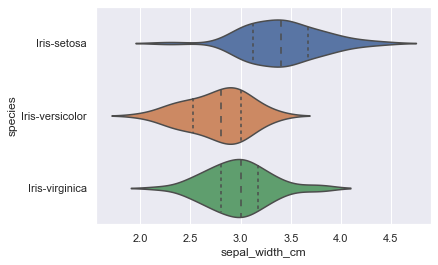

Petal Length


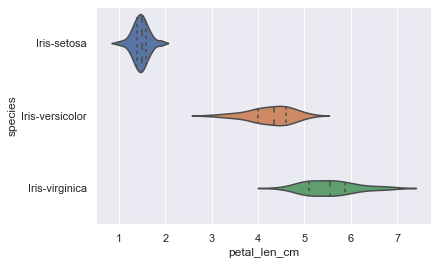

Petal Width


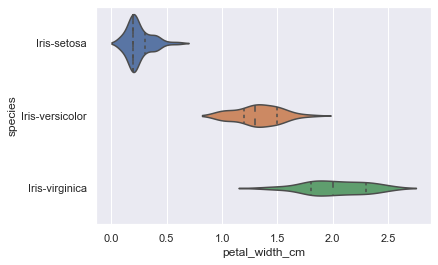

In [11]:
print("Sepal Length")
sns.violinplot(x='sepal_len_cm',y='species', data=data, inner='quartile')
plt.show()
print("Sepal Width")
sns.violinplot(x='sepal_width_cm',y='species', data=data, inner='quartile')
plt.show()
print("Petal Length")
sns.violinplot(x='petal_len_cm',y='species', data=data, inner='quartile')
plt.show()
print("Petal Width")
sns.violinplot(x='petal_width_cm',y='species', data=data, inner='quartile')
plt.show()

# Splitting Dataset

In [12]:
x = data.drop(columns=['species'])
y = data.species

In [13]:
x.head()

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=5)

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred_train = log.predict(x_train)
y_pred_test=log.predict(x_test)

In [18]:
print(confusion_matrix(y_test,y_pred_test))

[[16  0  0]
 [ 0 16  1]
 [ 0  0 17]]


In [19]:
print(classification_report(y_test,y_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        17

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [20]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("##########"*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.98
####################################################################################################
Test Accuracy : 0.98


# KNN Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
knn_pred_train = knn.predict(x_train)
knn_pred_test = knn.predict(x_test)

In [23]:
print(confusion_matrix(y_test,knn_pred_test))

[[16  0  0]
 [ 0 15  2]
 [ 0  0 17]]


In [24]:
print(classification_report(y_test,knn_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.89      1.00      0.94        17

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [25]:
print("Training Accuracy :", accuracy_score(y_train, knn_pred_train))
print("##########"*10)
print("Test Accuracy :", accuracy_score(y_test, knn_pred_test))

Training Accuracy : 0.97
####################################################################################################
Test Accuracy : 0.96


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [27]:
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)

In [28]:
print(confusion_matrix(y_test,rf_pred_test))

[[16  0  0]
 [ 0 16  1]
 [ 0  2 15]]


In [29]:
print(classification_report(y_test,rf_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      0.94      0.91        17
 Iris-virginica       0.94      0.88      0.91        17

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50



In [30]:
print("Training Accuracy :", accuracy_score(y_train, rf_pred_train))
print("##########"*10)
print("Test Accuracy :", accuracy_score(y_test, rf_pred_test))

Training Accuracy : 1.0
####################################################################################################
Test Accuracy : 0.94


# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1, max_depth=6)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [32]:
dt_pred_train = dt.predict(x_train)
dt_pred_test = dt.predict(x_test)

In [33]:
print(confusion_matrix(y_test,dt_pred_test))

[[16  0  0]
 [ 0 15  2]
 [ 0  1 16]]


In [34]:
print(classification_report(y_test,dt_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.89      0.94      0.91        17

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50



In [35]:
print("Training Accuracy :", accuracy_score(y_train, dt_pred_train))
print("##########"*10)
print("Test Accuracy :", accuracy_score(y_test, dt_pred_test))

Training Accuracy : 1.0
####################################################################################################
Test Accuracy : 0.94


# Overall Analysis - Accuracy Score

In [36]:
### ML Model                 Training Score     Test Score
### Logistic Regression          98%                98%
### KNN                          97%                96%
### Random Forest               100%                94%
### Decision Tree               100%                94%